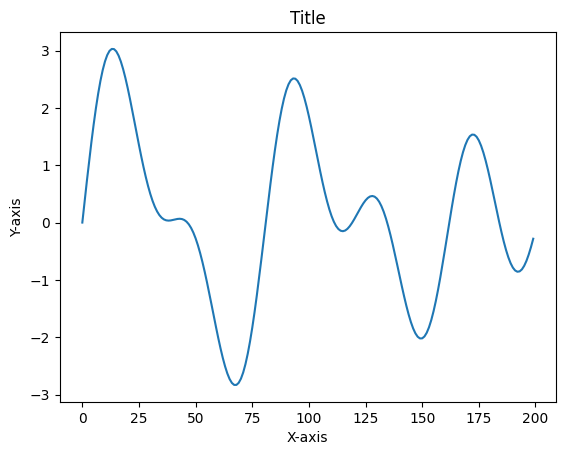

In [1]:
from Circuits.Ising import initialize_Ising_circuit
from Circuits.MPS import initialize_MPS_circuit
from DataPreprocessing import full_signal, Data
from Functions.TrainingFuncs import *

In [2]:
# Hyperparameters
Data = Data #  Change the dataset in DataPreprocessing
Architecture = 'MPS'
Learning_rate = 0.1
Epochs = 10

In [3]:
path = 'Results/' + Data + '/' + Architecture + '/' + str(Learning_rate) + '/' + str(Epochs) + '/' # Folder is automatically created using above specified parameters. Change path here to specify additional hyperparameters.

In [9]:
initialize_circuit = import_circuit(Architecture)
circuit, weights, n_qubits = initialize_circuit()

In [10]:
train, test, train_size, test_size, train_ratio, indices = split_train_test(full_signal, n_qubits, random = True)
final_train, final_test, scaler = scale_data(train, test, train_size, test_size, n_qubits)

100%|██████████| 10/10 [00:01<00:00,  5.53it/s]


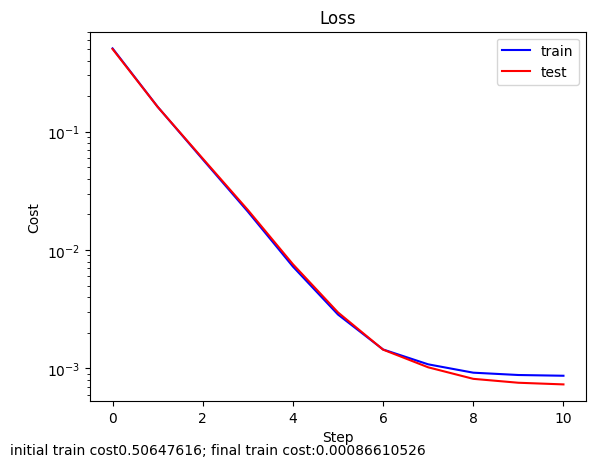

In [11]:
weights, x_t, target_y_t = train_model(final_train, final_test, weights, circuit, n_qubits, max_steps = 10, epochs = Epochs, bool_plot=True, save_plot=path, learning_rate=Learning_rate)

In [12]:
results_and_params = {
    "n_qubits" : n_qubits,
    "indices" : indices,
    "scaler" : scaler,
    "weights" : weights,
    "inputs" : x_t,
    "targets" : target_y_t,
    "initialize_circuit" : initialize_circuit
}

In [13]:
save_results_params(results_and_params, path)